
# 🎬 시나리오 기반 머신러닝 미션: 마케팅 전략과 건강 예측의 과학

당신은 데이터 과학자로 고용된 **헬스&뷰티 스타트업**의 분석 팀장입니다.  
회사의 마케팅 부서는 **광고 예산이 매출에 어떤 영향을 주는지**를 알고 싶어 하고,  
제품 개발 부서는 **사용자의 건강 데이터를 기반으로 당뇨병 위험군을 조기에 예측**하고자 합니다.

이번 프로젝트의 목표는 다음과 같습니다:

- 📈 **광고 채널별 효과 분석**을 통해 최적의 마케팅 예산 배분 전략을 수립한다.
- 🧪 **정규화 회귀 모델**을 통해 중요하지 않은 변수를 제거하고 모델 해석력을 높인다.
- ❤️ **건강 진단 데이터**를 통해 당뇨병 고위험군을 조기에 예측하여 건강 서비스를 제안한다.

이 시나리오를 바탕으로 실제 데이터를 분석하고 예측 모델을 만들어봅시다!


## 🎯 미션 1: 선형회귀 (Linear Regression)

설명: TV, 라디오, 신문 광고 예산에 따른 제품 매출을 예측하는 선형 회귀 모델을 만들어보세요.

데이터: Advertising.csv (TV, Radio, Newspaper, Sales)

지시사항:

1. 데이터셋을 불러오고 탐색하세요.

2. TV, Radio, Newspaper를 feature로 하여 Sales를 예측하는 선형 회귀 모델을 만들어보세요.

3. 예측 정확도를 R² score로 확인하세요.

4. 각 feature의 계수를 해석해보세요.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 데이터 로드
# 데이터 URL
url = "https://raw.githubusercontent.com/chandanverma07/DataSets/master/Advertising.csv"

# 데이터 불러오기
df = pd.read_csv(url)

print(df.head())

# 독립변수, 종속변수 설정
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# 학습용/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# R² 점수 출력
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")

# 회귀 계수 출력
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\n회귀 계수:")
print(coefficients)

# 절편 출력
print(f"\n절편 (Intercept): {model.intercept_:.4f}")


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
R² score: 0.8994

회귀 계수:
     Feature  Coefficient
0         TV     0.044730
1      radio     0.189195
2  newspaper     0.002761

절편 (Intercept): 2.9791



## 🎯 미션 1-2: 릿지 회귀 (Ridge Regression)

**설명**: L2 정규화를 통해 과적합을 방지하고 모델의 안정성을 확보합니다.
설명: 같은 데이터를 사용하되 릿지 회귀로 정규화 효과를 확인해보세요.

지시사항:

1. 동일한 feature로 릿지 회귀 모델을 학습시키되, alpha 값을 [0.01, 1, 100]로 설정해 비교하세요.

2. 각 모델의 계수 변화와 R² 점수를 시각화하세요.

3. 어떤 alpha 값이 가장 좋은 성능을 보였는지 해석해보세요.



[Ridge alpha=0.01] R² score: 0.8994
계수: [0.04472952 0.18919499 0.00276113]

[Ridge alpha=1] R² score: 0.8994
계수: [0.04472953 0.18918869 0.00276287]

[Ridge alpha=100] R² score: 0.8994
계수: [0.04473076 0.18856051 0.00293583]


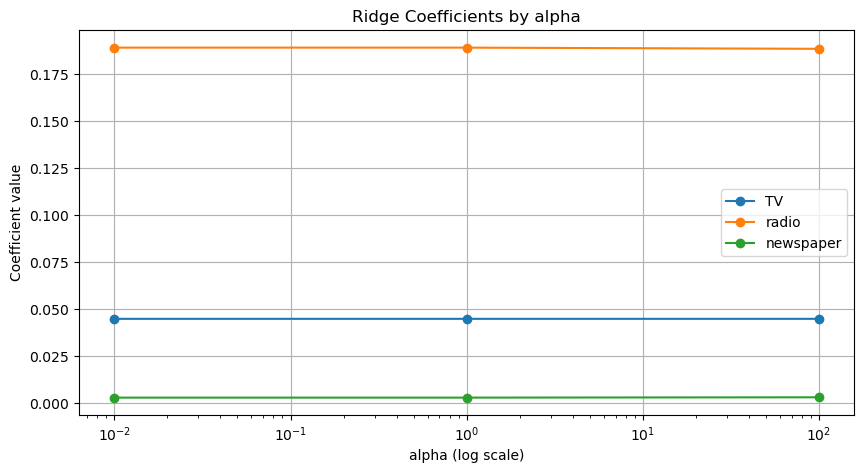

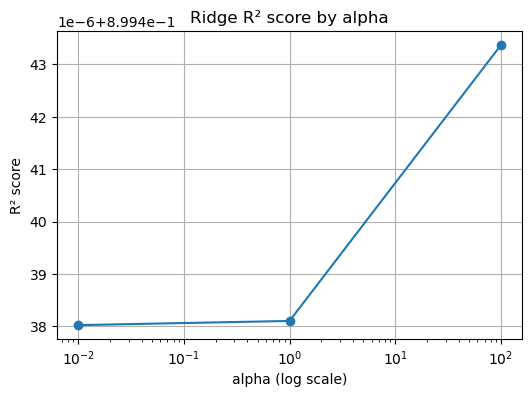

In [2]:
from sklearn.linear_model import Ridge
import numpy as np

alphas = [0.01, 1, 100]

ridge_models = []
r2_scores = []
coefficients_list = []

# 각 alpha에 대해 릿지 회귀 모델 학습
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred_ridge)

    ridge_models.append(ridge)
    r2_scores.append(r2)
    coefficients_list.append(ridge.coef_)

    print(f"\n[Ridge alpha={alpha}] R² score: {r2:.4f}")
    print("계수:", ridge.coef_)

# 시각화: 계수 변화
plt.figure(figsize=(10, 5))

for i, feature in enumerate(X.columns):
    coeffs = [coef[i] for coef in coefficients_list]
    plt.plot(alphas, coeffs, marker='o', label=feature)

plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('Ridge Coefficients by alpha')
plt.legend()
plt.grid(True)
plt.show()

# 시각화: R² score 비교
plt.figure(figsize=(6, 4))
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('R² score')
plt.title('Ridge R² score by alpha')
plt.grid(True)
plt.show()



## 🎯 미션 1-3: 라쏘 회귀 (Lasso Regression)


설명: Lasso 회귀는 불필요한 feature의 계수를 0으로 만드는 특성이 있습니다.

지시사항:

1. alpha 값을 [0.01, 1, 100]로 조절하여 Lasso 회귀 모델을 학습시키세요.

2. 계수가 0이 되는 feature가 있는지 확인하고 시각화하세요.

3. 어떤 변수가 모델에서 제외되었는지 해석해보세요.



[Lasso alpha=0.01] R² score: 0.8994
계수: [0.04472849 0.18915733 0.00274752]

[Lasso alpha=1] R² score: 0.9004
계수: [0.04463068 0.18535048 0.00142196]

[Lasso alpha=100] R² score: 0.5915
계수: [0.03240943 0.         0.        ]


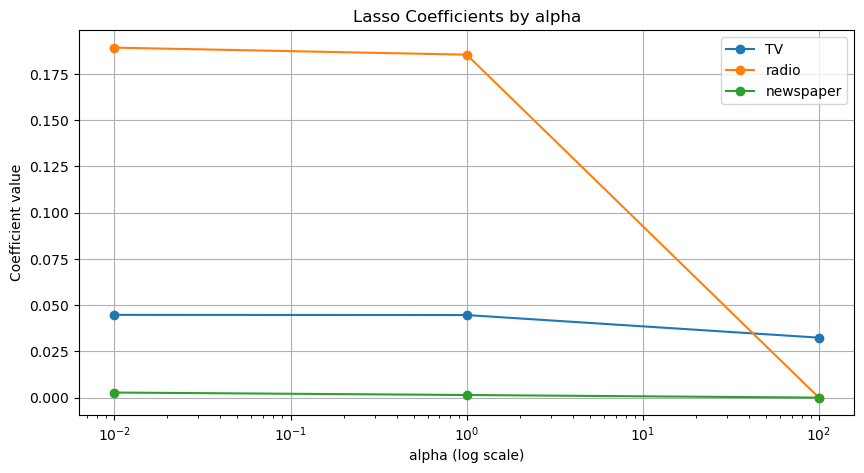

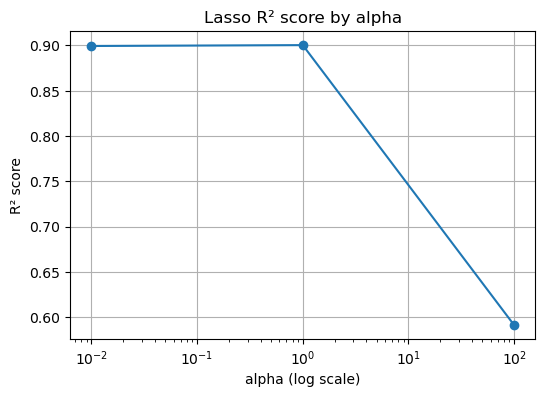


[Lasso alpha=0.01] 계수가 0이 된 feature: 없음

[Lasso alpha=1] 계수가 0이 된 feature: 없음

[Lasso alpha=100] 계수가 0이 된 feature: ['radio', 'newspaper']


In [3]:
from sklearn.linear_model import Lasso

alphas = [0.01, 1, 100]

lasso_models = []
lasso_r2_scores = []
lasso_coefficients = []

# 각 alpha에 대해 Lasso 회귀 모델 학습
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)  # max_iter 늘려서 수렴 문제 방지
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred_lasso)

    lasso_models.append(lasso)
    lasso_r2_scores.append(r2)
    lasso_coefficients.append(lasso.coef_)

    print(f"\n[Lasso alpha={alpha}] R² score: {r2:.4f}")
    print("계수:", lasso.coef_)

# 시각화: Lasso 계수 변화
plt.figure(figsize=(10, 5))

for i, feature in enumerate(X.columns):
    coeffs = [coef[i] for coef in lasso_coefficients]
    plt.plot(alphas, coeffs, marker='o', label=feature)

plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('Lasso Coefficients by alpha')
plt.legend()
plt.grid(True)
plt.show()

# 시각화: Lasso R² score 변화
plt.figure(figsize=(6, 4))
plt.plot(alphas, lasso_r2_scores, marker='o')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('R² score')
plt.title('Lasso R² score by alpha')
plt.grid(True)
plt.show()

# 계수가 0인 feature 확인
for i, alpha in enumerate(alphas):
    zero_coeffs = [X.columns[j] for j, c in enumerate(lasso_coefficients[i]) if c == 0]
    print(f"\n[Lasso alpha={alpha}] 계수가 0이 된 feature: {zero_coeffs if zero_coeffs else '없음'}")
